In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from qhlib import functions as qfn

## Detection counts distributions and errors

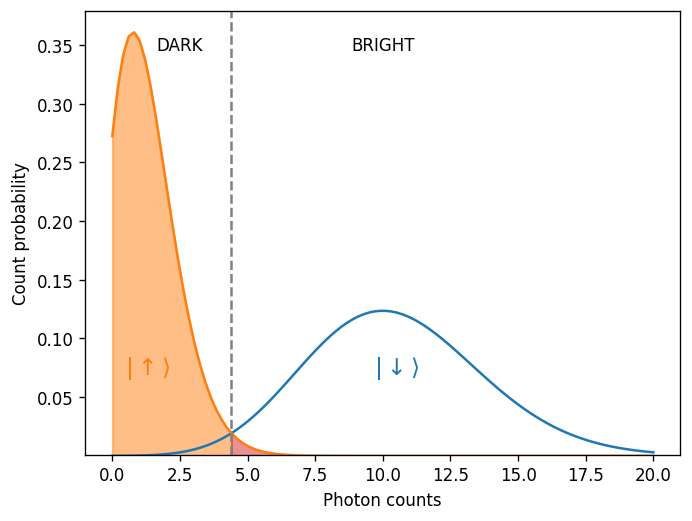

In [82]:
from scipy.stats import poisson
from scipy.special import factorial
from scipy.optimize import brentq

mean_bright = 10.5
mean_dark = 1.3

def poisson_distribution(x, mu):
    return np.exp(-mu) * mu**x / factorial(x)
    # return poisson.pmf(x, mu)

x = np.linspace(0, 20, 100)

y_bright = poisson_distribution(x, mean_bright)
y_dark = poisson_distribution(x, mean_dark)

threshold = brentq(lambda x: poisson_distribution(x, mean_bright) - poisson_distribution(x, mean_dark), 2.5, 10)
x1 = np.linspace(0, threshold)
x2 = np.linspace(threshold, 20)

with plt.style.context('notes.mplstyle'):
    fig, ax = plt.subplots()
    ax.plot(x, y_bright, label='Bright')
    ax.plot(x, y_dark, label='Dark')

    ax.set(
        # yscale='log',
        ylim=(1e-3, None),
        xlabel='Photon counts',
        ylabel='Count probability'
    )

    ax.axvline(threshold, color='gray', linestyle='--', label='Threshold')

    ax.fill_between(x1, poisson_distribution(x1, mean_dark), color='C1', alpha=0.5)
    ax.fill_between(x2, poisson_distribution(x2, mean_dark), color='C3', alpha=0.5)

    ax.text(mean_dark, 0.075, '$|\\uparrow\\rangle$', color='C1', va='center', ha='center', fontsize=14)
    ax.text(mean_bright, 0.075, '$|\\downarrow\\rangle$', color='C0', va='center', ha='center', fontsize=14)
    
    ax.text(2.5, 0.35, "DARK", va='center', ha='center')
    ax.text(10, 0.35, "BRIGHT", va='center', ha='center')



## Ramsey and echo window functions

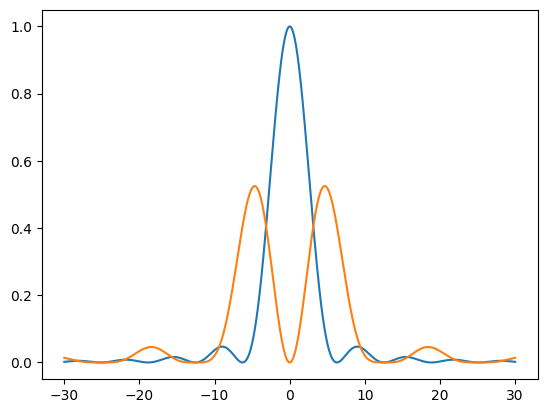

In [83]:
# x = omega t
def ramsey_window(x):
    return (np.sin(x/2) / (x/2))**2

def echo_window(x):
    return (np.sin(x/4)**2 / (x/4))**2


x = np.linspace(-30, 30, 1000)
plt.plot(x, ramsey_window(x))
plt.plot(x, echo_window(x))


## Sideband rabi flop for thermal states

7
38
146


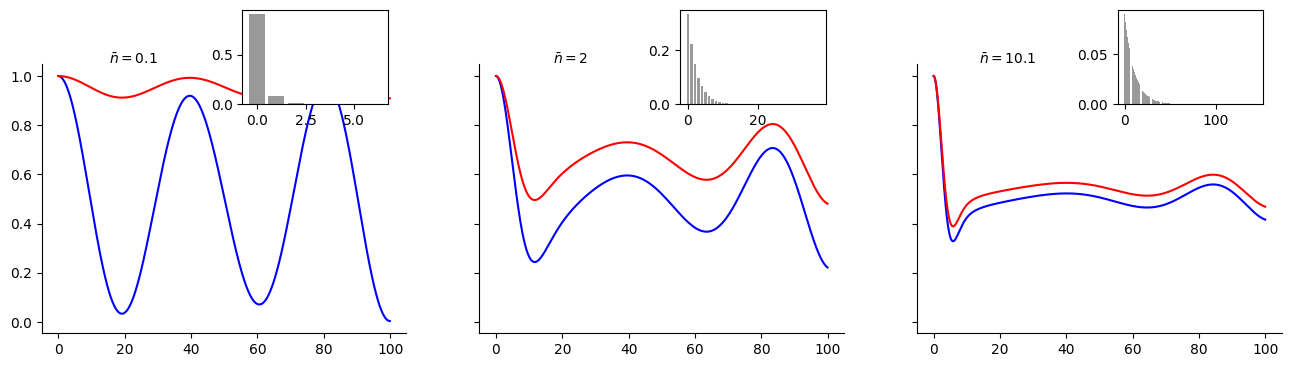

In [6]:
t = np.arange(0.0, 100.0, 0.1)
Omega = 2 * np.pi * 0.5  # MHz
eta = 0.05
nbars = [0.1, 2, 10.1]


fig, axes = plt.subplots(1, len(nbars), figsize=(16, 3.5), sharex=True, sharey=True, squeeze=False)
axes = axes.ravel()

for ax, nbar in zip(axes, nbars):
    axins = ax.inset_axes([0.55, 0.85, 0.4, 0.35])
    nmax = qfn.thermal_state_nmax(nbar, 1e-7)
    print(nmax)

    n = np.arange(nmax)
    p = qfn.thermal_state_populations(n, nbar)

    ax.plot(t, qfn.thermal_bsb_rabi_flop(t, Omega, eta, nbar, nmax), color="b")
    ax.plot(t, qfn.thermal_rsb_rabi_flop(t, Omega, eta, nbar, nmax), color="r")
    ax.text(0.25, 1, f"$\\bar n = {nbar}$", transform=ax.transAxes, ha="center")
    axins.bar(n, p, alpha=0.8, color="gray")
    # axins.set_yscale('log')

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

## Sideband rabi flop for coherent states
(only BSB)

50
50
50


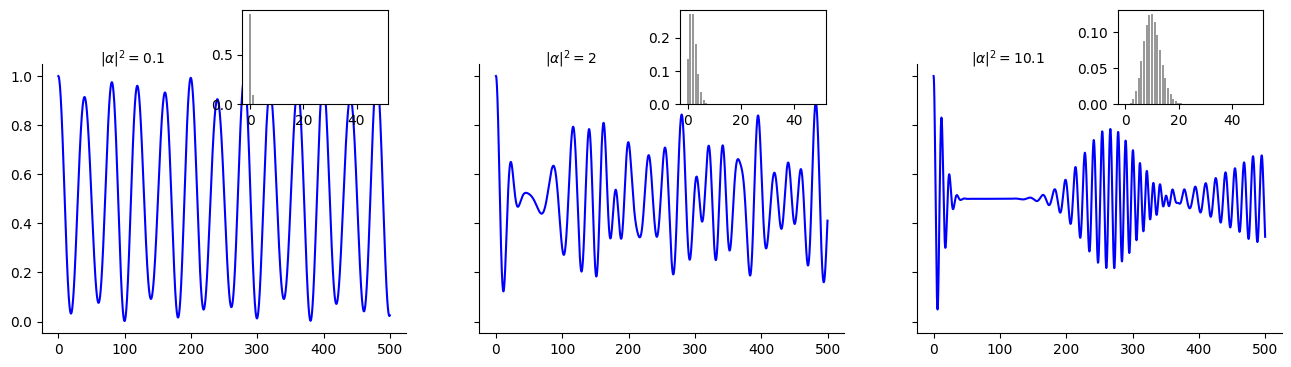

In [7]:
from qhlib import functions as qfn


t = np.arange(0.0, 500.0, 0.1)
Omega = 2 * np.pi * 0.5  # MHz
eta = 0.05
alpha2s = [0.1, 2, 10.1]


fig, axes = plt.subplots(1, len(nbars), figsize=(16, 3.5), sharex=True, sharey=True, squeeze=False)
axes = axes.ravel()

for ax, alpha2 in zip(axes, alpha2s):
    axins = ax.inset_axes([0.55, 0.85, 0.4, 0.35])
    nmax = 50
    print(nmax)

    n = np.arange(nmax)
    p = qfn.coherent_state_populations(n, alpha2)

    ax.plot(t, qfn.coherent_bsb_rabi_flop(t, Omega, eta, alpha2, nmax), color="b")
    ax.text(0.25, 1, f"$|\\alpha|^2 = {alpha2}$", transform=ax.transAxes, ha="center")
    axins.bar(n, p, alpha=0.8, color="gray")
    # axins.set_yscale('log')

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

## Thermal carrier rabi flops

38
144
387


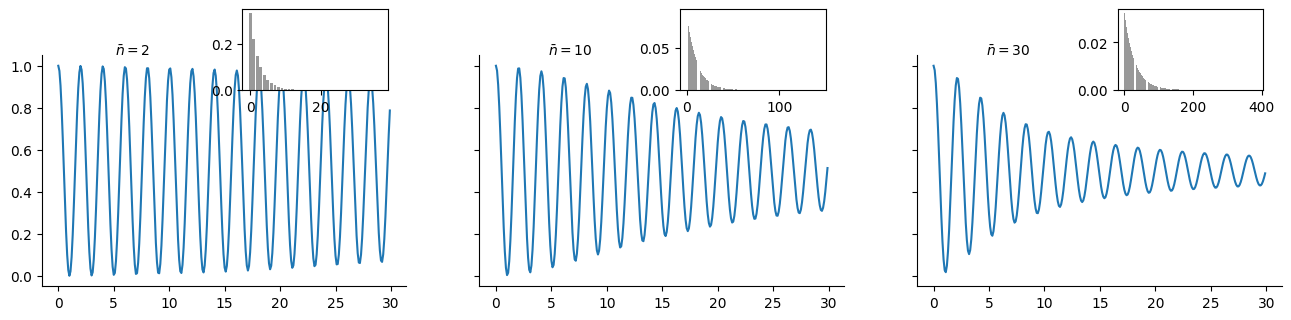

In [8]:
t = np.arange(0.0, 30.0, 0.1)
Omega = 2 * np.pi * 0.5  # MHz
eta = 0.05
nbars = [2, 10, 30]


fig, axes = plt.subplots(1, len(nbars), figsize=(16, 3), sharex=True, sharey=True, squeeze=False)
axes = axes.ravel()

for ax, nbar in zip(axes, nbars):
    axins = ax.inset_axes([0.55, 0.85, 0.4, 0.35])
    nmax = qfn.thermal_state_nmax(nbar, 1e-7)
    print(nmax)

    n = np.arange(nmax)
    p = qfn.thermal_state_populations(n, nbar)

    ax.plot(t, qfn.thermal_carrier_rabi_flop(t, Omega, eta, nbar, nmax))
    ax.text(0.25, 1, f"$\\bar n = {nbar}$", transform=ax.transAxes, ha="center")
    axins.bar(n, p, alpha=0.8, color="gray")
    # axins.set_yscale('log')

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

## Motional Ramsey - $P_0$

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\carmelo\AppData\Local\Temp\ipykernel_16080\4009395762.py:10: SyntaxWarning: invalid escape sequence '\d'
  ax.set(xlabel="$\delta t$", ylabel="$P_0$")


[Text(0.5, 0, '$\\delta t$'), Text(0, 0.5, '$P_0$')]

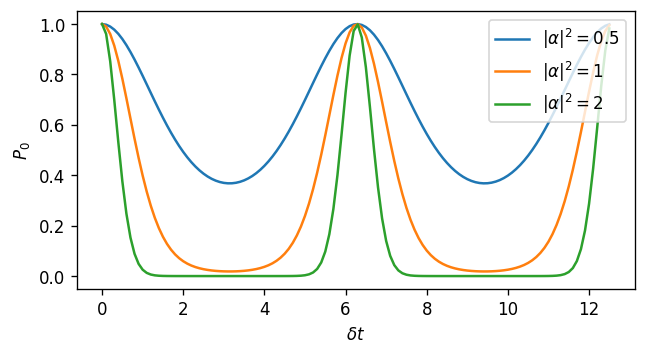

In [9]:
x = np.arange(0, 4*np.pi, 0.1)

fig, ax = plt.subplots(figsize=(6, 3), dpi=120)
for a in [0.5, 1, 2]:
    y = np.exp(-2 * a**2 * (1 - np.cos(x)))

    ax.plot(x, y, label=f"$|\\alpha|^2 = {a}$")

ax.legend(loc="upper right")
ax.set(xlabel="$\delta t$", ylabel="$P_0$")